<a href="https://colab.research.google.com/github/njadux/DCGAN-FashionMNIST-Generator/blob/main/fashion_mnist_image_generation_using_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project implements a Deep Convolutional Generative Adversarial Network (DCGAN) to generate synthetic images resembling the Fashion MNIST dataset. The DCGAN consists of two deep learning models:

- Generator: A neural network that takes random noise as input and transforms it into realistic-looking fashion item images using transposed convolution layers.
- Discriminator: A convolutional neural network that distinguishes between real Fashion MNIST images and synthetic images produced by the generator.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU, BatchNormalization, ReLU, Lambda
from tensorflow.keras.models import Model

In [ ]:
# Load Fashion MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images to [-1, 1] (better for GANs)
train_images = train_images.astype('float32') / 127.5 - 1
train_images = np.expand_dims(train_images, axis=-1)  # Reshape to (28, 28, 1)

# Batch and shuffle dataset
BUFFER_SIZE = 60000
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


The Dense layer expands this into a larger feature space (7 × 7 × 256).

In [ ]:
def build_generator():
    model = Sequential([
        Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)),
        LeakyReLU(alpha=0.2),
        Reshape((7, 7, 256)),

        Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
def build_discriminator():
    model = Sequential([
        Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        LeakyReLU(alpha=0.2),
        Dropout(0.3),

        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

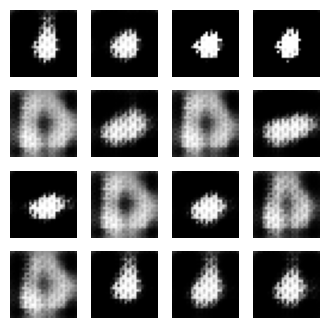

Epoch 1 completed in 12.74 sec


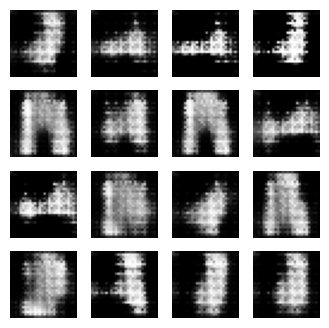

Epoch 2 completed in 7.31 sec


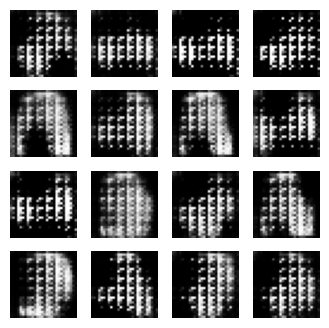

Epoch 3 completed in 7.54 sec


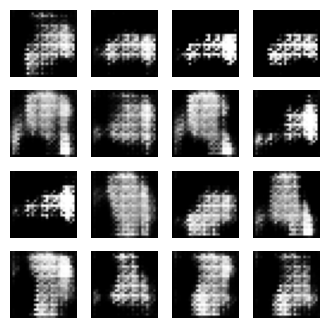

Epoch 4 completed in 7.31 sec


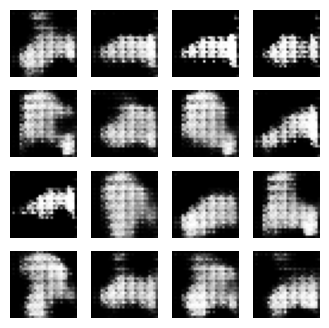

Epoch 5 completed in 7.29 sec


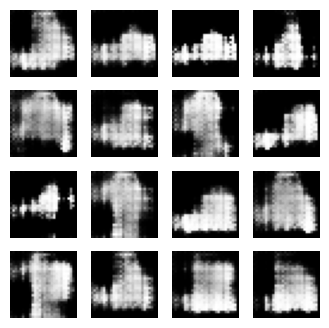

Epoch 6 completed in 7.30 sec


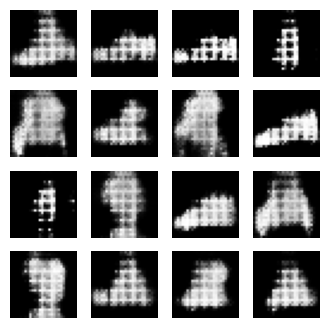

Epoch 7 completed in 7.57 sec


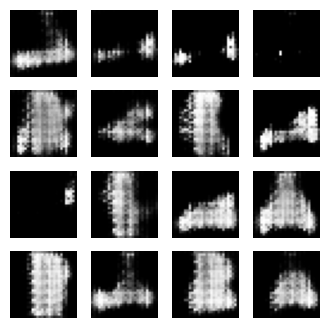

Epoch 8 completed in 7.29 sec


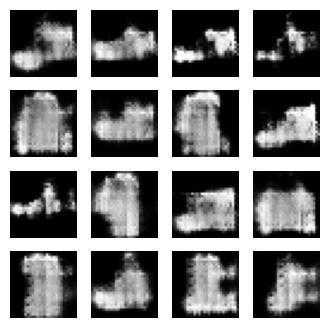

Epoch 9 completed in 7.30 sec


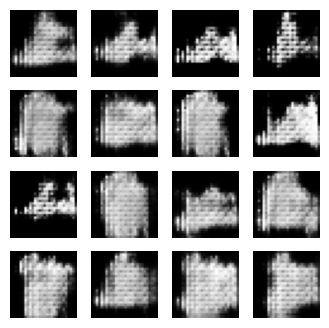

Epoch 10 completed in 7.33 sec


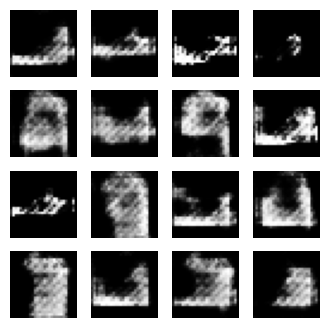

Epoch 11 completed in 7.28 sec


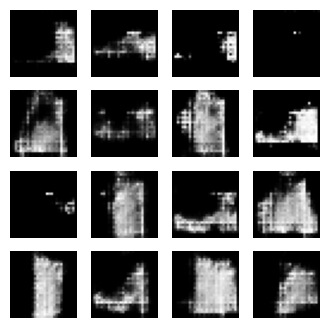

Epoch 12 completed in 7.56 sec


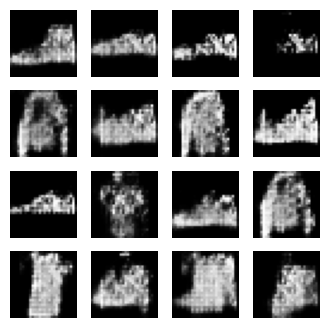

Epoch 13 completed in 7.29 sec


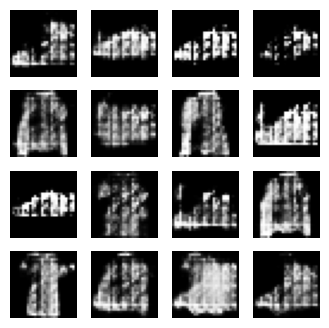

Epoch 14 completed in 7.29 sec


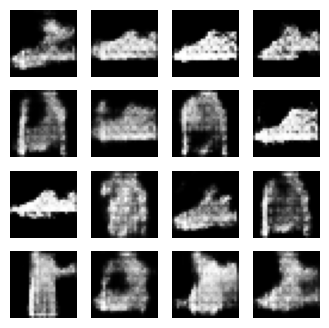

Epoch 15 completed in 7.55 sec


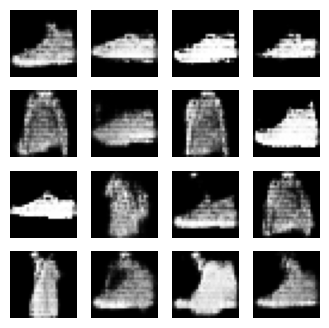

Epoch 16 completed in 7.28 sec


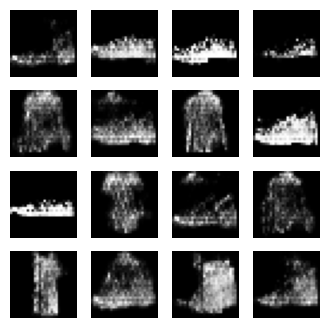

Epoch 17 completed in 7.31 sec


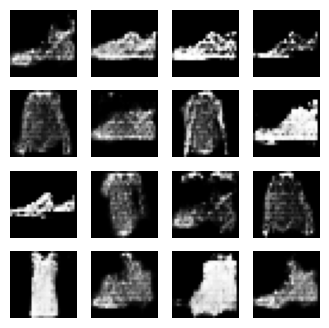

Epoch 18 completed in 7.28 sec


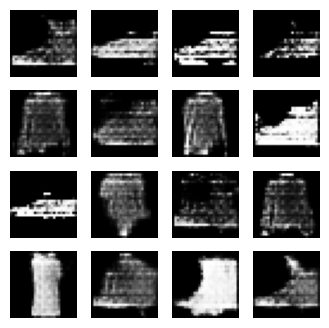

Epoch 19 completed in 7.28 sec


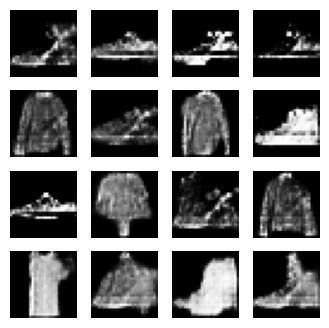

Epoch 20 completed in 7.54 sec


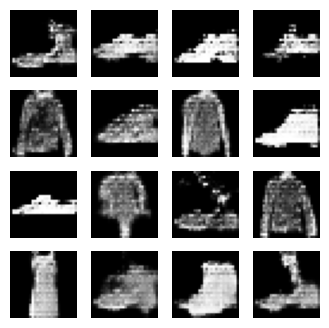

Epoch 21 completed in 7.28 sec


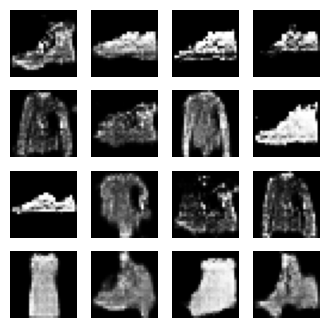

Epoch 22 completed in 7.29 sec


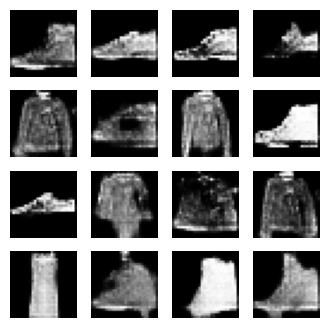

Epoch 23 completed in 7.54 sec


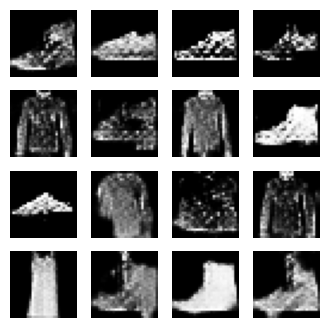

Epoch 24 completed in 7.29 sec


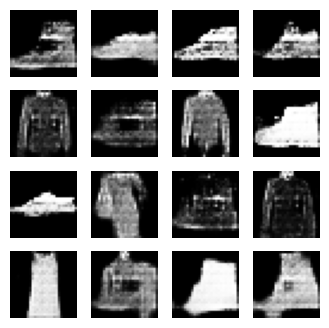

Epoch 25 completed in 7.29 sec


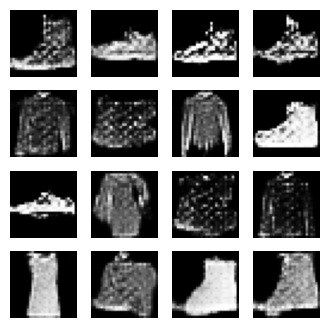

Epoch 26 completed in 7.29 sec


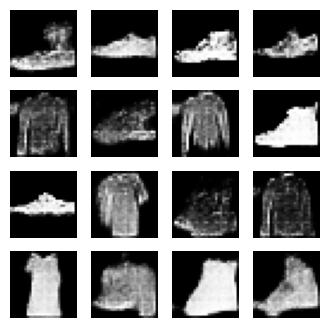

Epoch 27 completed in 7.54 sec


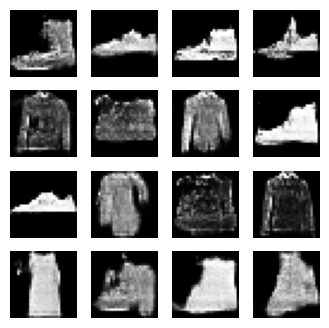

Epoch 28 completed in 7.28 sec


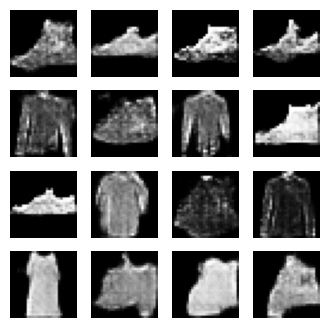

Epoch 29 completed in 7.29 sec


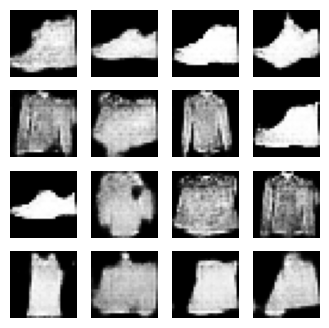

Epoch 30 completed in 7.29 sec


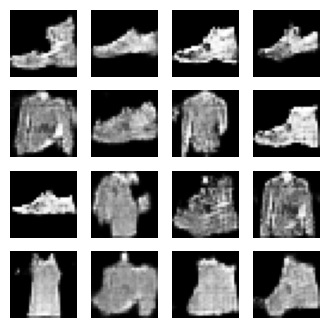

Epoch 31 completed in 7.31 sec


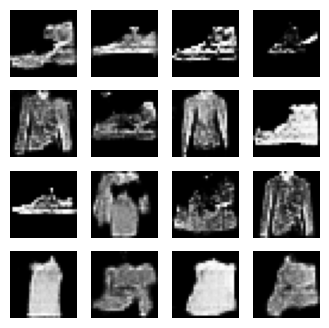

Epoch 32 completed in 7.61 sec


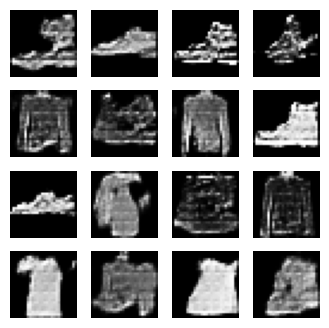

Epoch 33 completed in 7.29 sec


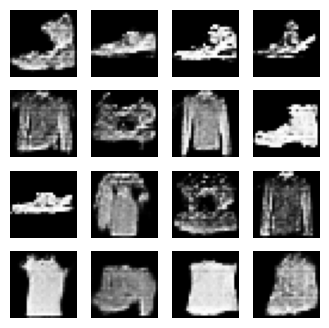

Epoch 34 completed in 7.29 sec


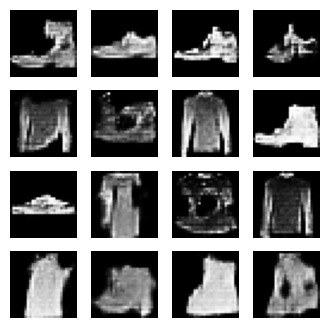

Epoch 35 completed in 7.54 sec


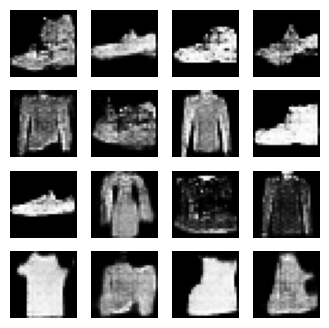

Epoch 36 completed in 7.30 sec


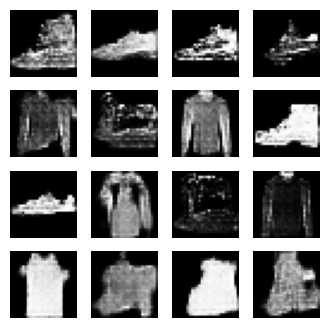

Epoch 37 completed in 7.29 sec


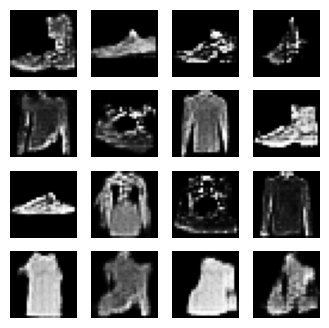

Epoch 38 completed in 7.29 sec


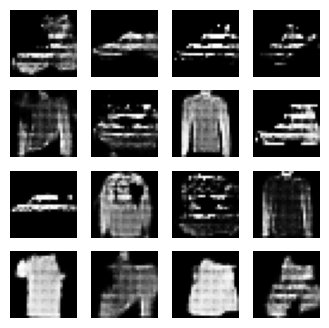

Epoch 39 completed in 7.29 sec


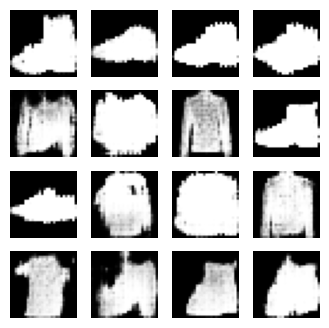

Epoch 40 completed in 7.55 sec


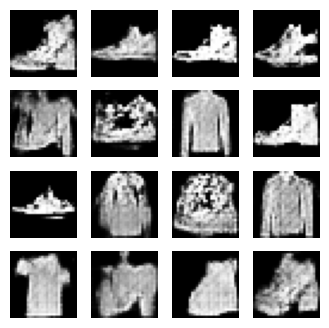

Epoch 41 completed in 7.30 sec


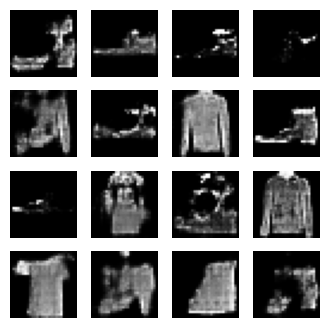

Epoch 42 completed in 7.28 sec


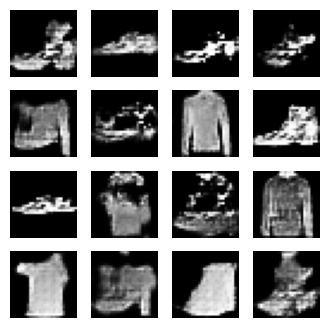

Epoch 43 completed in 7.54 sec


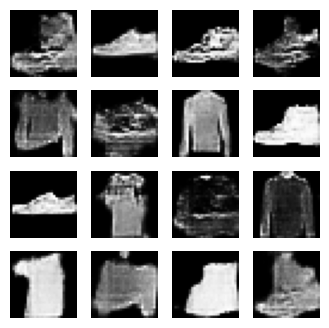

Epoch 44 completed in 7.29 sec


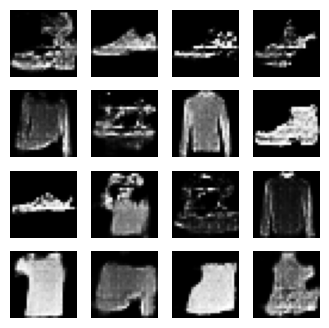

Epoch 45 completed in 7.30 sec


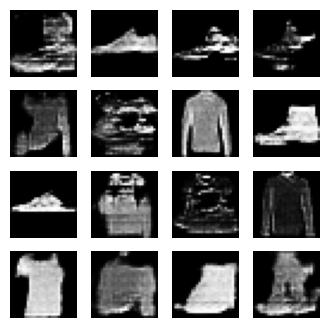

Epoch 46 completed in 7.30 sec


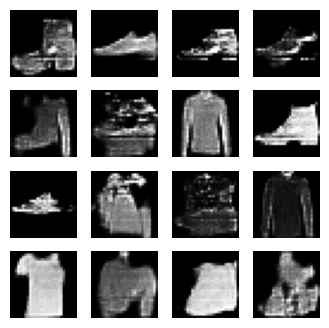

Epoch 47 completed in 7.29 sec


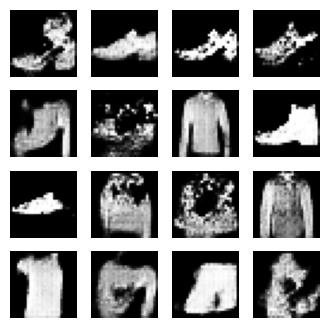

Epoch 48 completed in 7.55 sec


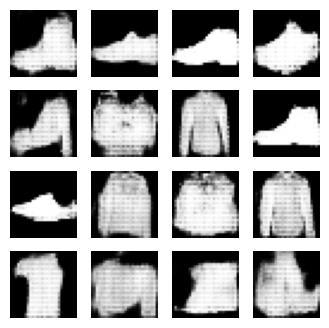

Epoch 49 completed in 7.30 sec


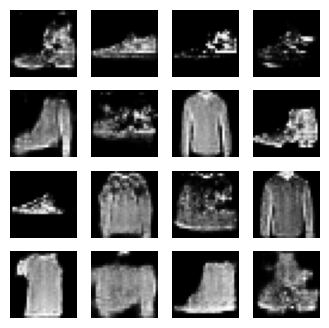

Epoch 50 completed in 7.29 sec


In [ ]:
import time

EPOCHS = 50
NOISE_DIM = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, NOISE_DIM])

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        generate_and_save_images(generator, epoch + 1, seed)
        print(f'Epoch {epoch+1} completed in {time.time()-start:.2f} sec')

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch}.png')
    plt.show()

train(train_dataset, EPOCHS)

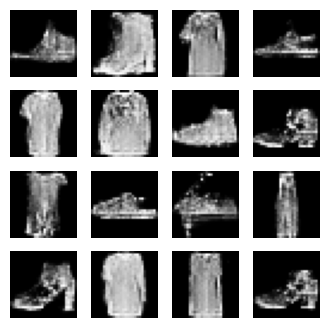

In [ ]:
noise = tf.random.normal([16, 100])
generated_images = generator(noise, training=False)

plt.figure(figsize=(4,4))
for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
plt.show()

Enter the number of images to generate (e.g., 4, 16, 25):  34


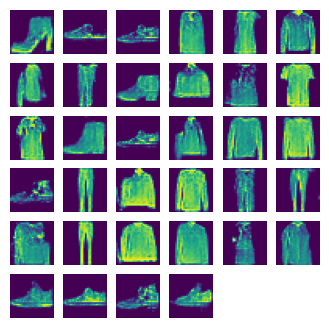

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to generate and display images
def generate_images(model, num_images):
    noise = tf.random.normal([num_images, 100])  # Generate random noise
    predictions = model(noise, training=False)  # Generate images

    # Compute optimal rows and columns
    rows = math.ceil(math.sqrt(num_images))
    cols = math.ceil(num_images / rows)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(rows, cols, i + 1)

        # Normalize image to [0,1] if needed
        img = (predictions[i] + 1) / 2  # Assuming output range is [-1,1]

        plt.imshow(img)  # No 'cmap', as it's already RGB
        plt.axis('off')

    plt.show()

# Ask the user for input
num_images = int(input("Enter the number of images to generate (e.g., 4, 16, 25): "))

# Ensure num_images is positive
if num_images <= 0:
    print("Please enter a positive number.")
else:
    generate_images(generator, num_images)